In [3]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant
import seaborn as sns
from scipy import stats


df = pd.read_csv('coursework_1_data_2019.csv',low_memory=False)
#df.info()

# renaming columns
df_new=df.rename(columns={'2008_cases_total':'total_cases_2008',
                          '2013_cases_total':'total_cases_2013',
                          '2018_cases_total':'total_cases_2018',
                          '2008_pop_total':'total_pop_2008',
                          '2013_pop_total':'total_pop_2013',
                          '2018_pop_total':'total_pop_2018',
                          '2008_cases_male':'male_cases_2008',
                          '2013_cases_male':'male_cases_2013',
                          '2018_cases_male':'male_cases_2018',
                          '2008_cases_female':'female_cases_2008',
                          '2013_cases_female':'female_cases_2013',
                          '2018_cases_female':'female_cases_2018',
                          '2008_pop_male':'male_pop_2008',
                          '2013_pop_male':'male_pop_2013',
                          '2018_pop_male':'male_pop_2018',
                          '2008_pop_female':'female_pop_2008',
                          '2013_pop_female':'female_pop_2013',
                          '2018_pop_female':'female_pop_2018',
                         })
df_new.info()




correlation_matrix = df_new.corr()
plt.figure(figsize=(20,20))
#sns.heatmap(correlation_matrix,linewidths=.1,cbar=True)#annot=True, fmt="f"


df_new.sample(6,random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   local_authority_area  152 non-null    object
 1   total_cases_2008      152 non-null    int64 
 2   total_cases_2013      152 non-null    int64 
 3   total_cases_2018      152 non-null    int64 
 4   total_pop_2008        152 non-null    int64 
 5   total_pop_2013        152 non-null    int64 
 6   total_pop_2018        152 non-null    int64 
 7   male_cases_2008       152 non-null    int64 
 8   male_cases_2013       152 non-null    int64 
 9   male_cases_2018       152 non-null    int64 
 10  male_pop_2008         152 non-null    int64 
 11  male_pop_2013         152 non-null    int64 
 12  male_pop_2018         152 non-null    int64 
 13  female_cases_2008     152 non-null    int64 
 14  female_cases_2013     152 non-null    int64 
 15  female_cases_2018     152 non-null    in

,local_authority_area,total_cases_2008,total_cases_2013,total_cases_2018,total_pop_2008,total_pop_2013,total_pop_2018,male_cases_2008,male_cases_2013,male_cases_2018,...,female_pop_2018,total_budget,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling,region,local_authority_type
68,Lancashire,4199,4419,5032,1173146,1208809,1267187,1582,1699,1907,...,643680,800000,180000,292000,41000,163000,33000,91000,North West,non_metropolitan_county
147,Wirral,2560,2652,2987,310630,312142,342200,965,1044,1103,...,174733,209000,69000,47000,30000,41000,14000,8000,North West,metropolitan_borough
96,Plymouth,706,752,761,257365,253227,264370,274,284,316,...,136624,209000,31000,56000,7000,57000,39000,19000,South West,unitary_authority
82,Newham,568,669,710,244074,241099,237261,192,210,206,...,126187,200000,31000,45000,22000,54000,31000,17000,London,london_borough
135,Wakefield,1729,1840,2067,325029,341459,358377,495,554,597,...,182621,240000,19000,105000,18000,56000,15000,27000,Yorkshire and the Humber,metropolitan_borough
139,Warrington,450,466,577,197555,201921,219312,205,214,282,...,112453,180000,44000,10000,19000,52000,34000,21000,North West,unitary_authority


<Figure size 1440x1440 with 0 Axes>

In [21]:
# Adding columns


df_new[['proportion_ill_2008']] = (df_new.total_cases_2008/df_new.total_pop_2008).round(4)*100
df_new[['proportion_ill_2013']] = (df_new.total_cases_2013/df_new.total_pop_2013).round(4)*100
df_new[['proportion_ill_2018']] = (df_new.total_cases_2018/df_new.total_pop_2018).round(4)*100

df_new[['dif_08_13']] = ((df_new.proportion_ill_2013-df_new.proportion_ill_2008)/df_new.proportion_ill_2008).round(2)*100

df_new[['dif_13_18']] = ((df_new.proportion_ill_2018-df_new.proportion_ill_2013)/df_new.proportion_ill_2013).round(2)*100

df_new[['dif_08_18']] = ((df_new.proportion_ill_2018-df_new.proportion_ill_2008)/df_new.proportion_ill_2008).round(2)*100

df_new[['spending_per_100K_2008']] = (df_new.total_budget/df_new.total_pop_2008).round(2)*100000
df_new[['spending_per_100K_2013']] = (df_new.total_budget/df_new.total_pop_2013).round(2)*100000
df_new[['spending_per_100K_2018']] = (df_new.total_budget/df_new.total_pop_2018).round(2)*100000

df_new[['proportion_clean_air']] = (df_new.clean_air/df_new.total_budget)
df_new[['proportion_clean_environ']] = (df_new.clean_environ/df_new.total_budget)
df_new[['proportion_health_training']] = (df_new.health_training/df_new.total_budget)
df_new[['proportion_school_awareness']] = (df_new.school_awareness/df_new.total_budget)
df_new[['proportion_media_awareness']] = (df_new.media_awareness/df_new.total_budget)
df_new[['proportion_sub_counselling']] = (df_new.sub_counselling/df_new.total_budget)

df_new[['clean_air_per_100K_08']] = (df_new.clean_air/df_new.total_pop_2008).round(2)*10
df_new[['clean_environ_per_100K_08']] = (df_new.clean_environ/df_new.total_pop_2008).round(2)*10
df_new[['health_training_per_100K_08']] = (df_new.health_training/df_new.total_pop_2008).round(2)*10
df_new[['school_awareness_per_100K_08']] = (df_new.school_awareness/df_new.total_pop_2008).round(2)*10
df_new[['media_awareness_per_100K_08']] = (df_new.media_awareness/df_new.total_pop_2008).round(2)*10
df_new[['sub_counselling_per_100K_08']] = (df_new.sub_counselling/df_new.total_pop_2008).round(2)*10

df_new[['clean_air_per_100K_13']] = (df_new.clean_air/df_new.total_pop_2013).round(2)*10
df_new[['clean_environ_per_100K_13']] = (df_new.clean_environ/df_new.total_pop_2013).round(2)*10
df_new[['health_training_per_100K_13']] = (df_new.health_training/df_new.total_pop_2013).round(2)*10
df_new[['school_awareness_per_100K_13']] = (df_new.school_awareness/df_new.total_pop_2013).round(2)*10
df_new[['media_awareness_per_100K_13']] = (df_new.media_awareness/df_new.total_pop_2013).round(2)*10
df_new[['sub_counselling_per_100K_13']] = (df_new.sub_counselling/df_new.total_pop_2013).round(2)*10

df_new[['clean_air_per_100K_18']] = (df_new.clean_air/df_new.total_pop_2018).round(2)*10
df_new[['clean_environ_per_100K_18']] = (df_new.clean_environ/df_new.total_pop_2018).round(2)*10
df_new[['health_training_per_100K_18']] = (df_new.health_training/df_new.total_pop_2018).round(2)*10
df_new[['school_awareness_per_100K_18']] = (df_new.school_awareness/df_new.total_pop_2018).round(2)*10
df_new[['media_awareness_per_100K_18']] = (df_new.media_awareness/df_new.total_pop_2018).round(2)*10
df_new[['sub_counselling_per_100K_18']] = (df_new.sub_counselling/df_new.total_pop_2018).round(2)*10

df_new[['proportion_male_2008']] = (df_new.male_pop_2008/df_new.total_pop_2008).round(3)
df_new[['proportion_male_2013']] = (df_new.male_pop_2013/df_new.total_pop_2013).round(3)
df_new[['proportion_male_2018']] = (df_new.male_pop_2018/df_new.total_pop_2018).round(3)

df_new[['dif_male_pop_08_13']] = ((df_new.proportion_male_2013-df_new.proportion_male_2008)/df_new.proportion_male_2008).round(3)
df_new[['dif_male_pop_13_18']] = ((df_new.proportion_male_2018-df_new.proportion_male_2013)/df_new.proportion_male_2013).round(3)
df_new[['dif_male_pop_08_18']] = ((df_new.proportion_male_2018-df_new.proportion_male_2008)/df_new.proportion_male_2008).round(3)
#df_new.info()


In [77]:
#summary statistics number of cases
print(df_new[['proportion_ill_2008','proportion_ill_2013','proportion_ill_2018','spending_per_100K_2008','spending_per_100K_2013','spending_per_100K_2018']].describe().round(3))

q1=df_new[['proportion_ill_2008','proportion_ill_2013','proportion_ill_2018']].quantile(0.25)
q3=df_new[['proportion_ill_2008','proportion_ill_2013','proportion_ill_2018']].quantile(0.75)
IQR=q3-q1
low=(q1-1.5*IQR).round(10)
high=(q3+1.5*IQR).round(3)
(df_new[['proportion_ill_2008','proportion_ill_2013','proportion_ill_2018']].max()) - (df_new[['proportion_ill_2008','proportion_ill_2013','proportion_ill_2018']].min())
df_new[['proportion_ill_2008','proportion_ill_2013','proportion_ill_2018']].var(axis=0).round(3)


       proportion_ill_2008  proportion_ill_2013  proportion_ill_2018  \
count              152.000              152.000              152.000   
mean                 0.310                0.321                0.345   
std                  0.137                0.139                0.138   
min                  0.070                0.040                0.100   
25%                  0.218                0.230                0.250   
50%                  0.290                0.300                0.320   
75%                  0.363                0.380                0.410   
max                  0.820                0.850                0.870   

       spending_per_100K_2008  spending_per_100K_2013  spending_per_100K_2018  
count                 152.000                 152.000                 152.000  
mean                81894.737               80184.211               78486.842  
std                 30348.344               36142.181               44988.886  
min                 65000.000  

proportion_ill_2008    0.019
proportion_ill_2013    0.019
proportion_ill_2018    0.019
dtype: float64

<AxesSubplot:title={'center':'Funds Distribution of 5 randomly selected Local Authorities.'}>

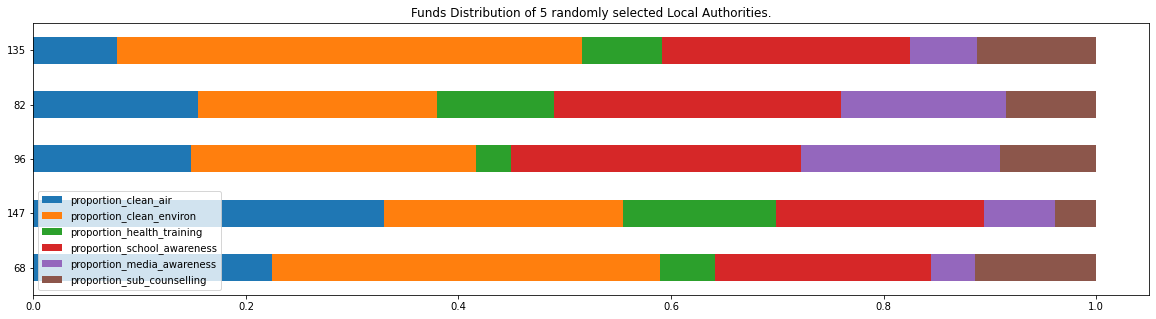

In [63]:
#summary statistics Funds Distribution of 5 randomly selected Local Authorities.
df_new_barplot = df_new[['proportion_clean_air','proportion_clean_environ','proportion_health_training','proportion_school_awareness','proportion_media_awareness','proportion_sub_counselling']].sample(5,random_state=42)
df_new_barplot.plot(kind = 'barh', stacked = True, title = 'Funds Distribution of 5 randomly selected Local Authorities.',figsize=(20,5)) 

       spending_per_100K_2008  spending_per_100K_2013  spending_per_100K_2018
count              152.000000              152.000000              152.000000
mean             81894.736842            80184.210526            78486.842105
std              30348.343594            36142.180793            44988.885580
min              65000.000000            61000.000000            58000.000000
25%              74000.000000            71000.000000            68000.000000
50%              79000.000000            77000.000000            74000.000000
75%              84000.000000            83000.000000            81000.000000
max             439000.000000           508000.000000           617000.000000


<AxesSubplot:>

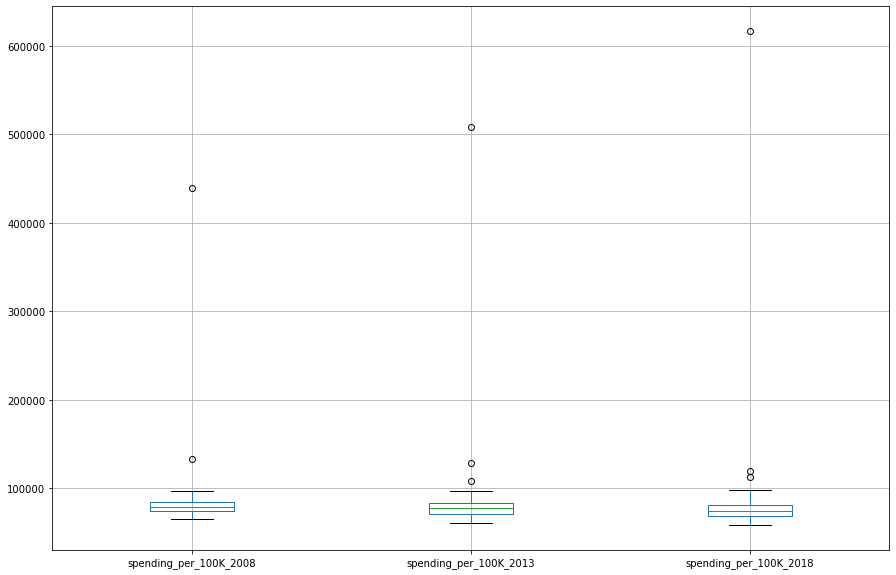

In [66]:
#summary statistics / looking for outliers
print(df_new[['spending_per_100K_2008','spending_per_100K_2013','spending_per_100K_2018']].describe())
df_new.boxplot(column=['spending_per_100K_2008','spending_per_100K_2013','spending_per_100K_2018'],figsize=(15,10))


<AxesSubplot:>

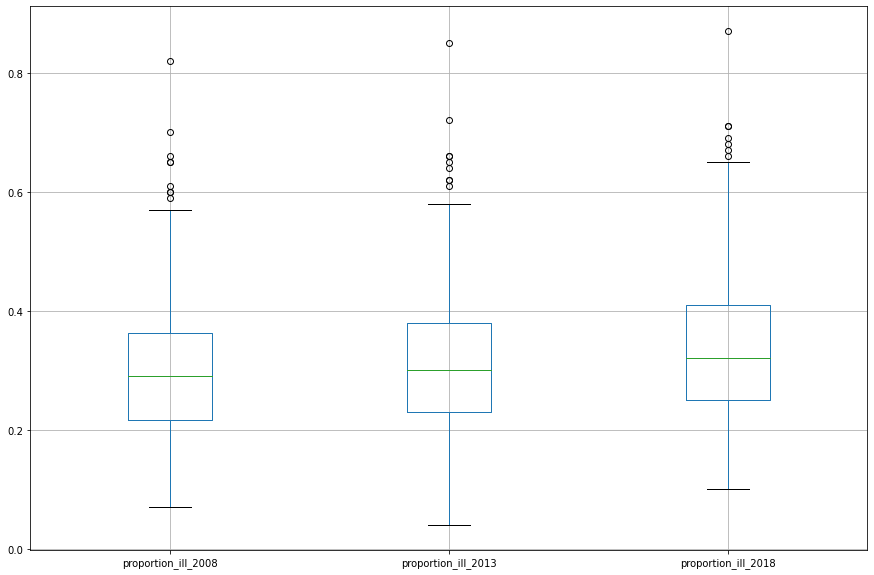

In [78]:
df_new.boxplot(column=['proportion_ill_2008','proportion_ill_2013','proportion_ill_2018'],figsize=(15,10))

<AxesSubplot:ylabel='Frequency'>

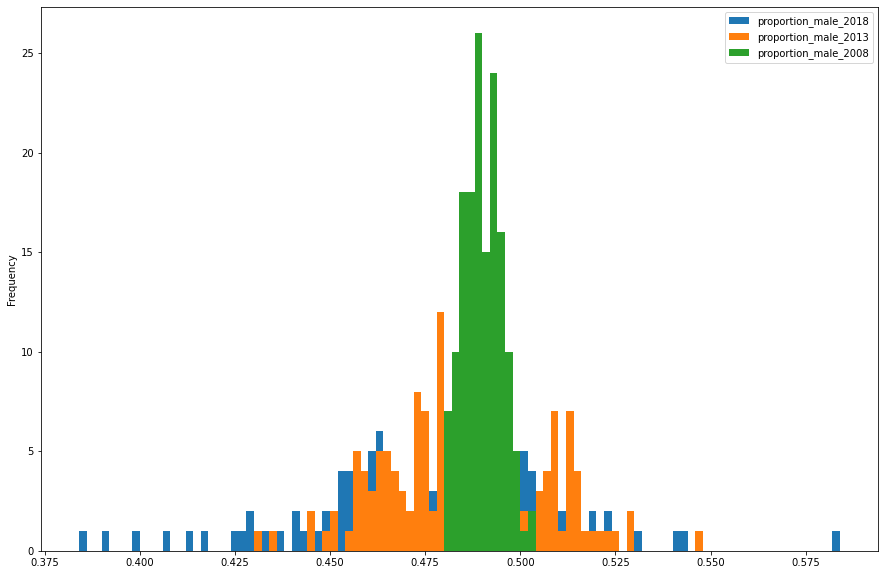

In [79]:
# proportion of male in population

df_new[['proportion_male_2018','proportion_male_2013','proportion_male_2008']].plot.hist(bins=100,figsize=(15,10),alpha=1)

In [23]:
# checking the budget totals
print("All budgets add up :" + str((df_new.total_budget == df_new[['clean_air','clean_environ',
                                      'health_training','school_awareness',
                                      'media_awareness','sub_counselling'
                                     ]].sum(axis=1)).value_counts()))
#Null/Nan columns
print("Null/Nan columns :" + str(df_new.isnull().sum(axis=0).value_counts()))
#Null/Nan rows
print("Null/Nan rows :" + str(df_new.isnull().sum(axis=1).value_counts()))

#looking for duplicates
print("Duplicates :" + str(df_new.duplicated(subset=None,keep='first').sum(axis=0)))

df_new.shape


All budgets add up :True    152
dtype: int64
Null/Nan columns :0    97
dtype: int64
Null/Nan rows :0    152
dtype: int64
Duplicates :0


(152, 97)

In [24]:
#Calculated variable
df_new[['spending_per_100K_mean']] = df_new[['spending_per_100K_2008','spending_per_100K_2013','spending_per_100K_2018']].mean(axis=1).round(2)
df_new[['clean_air_mean']] = df_new[['clean_air_per_100K_08','clean_air_per_100K_13','clean_air_per_100K_18']].mean(axis=1).round(2)
df_new[['clean_environ_mean']] = df_new[['clean_environ_per_100K_08','clean_environ_per_100K_13','clean_environ_per_100K_18']].mean(axis=1).round(2)
df_new[['health_training_mean']] = df_new[['health_training_per_100K_08','health_training_per_100K_13','health_training_per_100K_18']].mean(axis=1).round(2)
df_new[['school_awareness_mean']] = df_new[['school_awareness_per_100K_08','school_awareness_per_100K_13','school_awareness_per_100K_18']].mean(axis=1).round(2)
df_new[['media_awareness_mean']] = df_new[['media_awareness_per_100K_08','media_awareness_per_100K_13','media_awareness_per_100K_18']].mean(axis=1).round(2)
df_new[['sub_counselling_mean']] = df_new[['sub_counselling_per_100K_08','sub_counselling_per_100K_13','sub_counselling_per_100K_18']].mean(axis=1).round(2)

df_new[['spending_per_100K_mean_08_13']] = df_new[['spending_per_100K_2008','spending_per_100K_2013']].mean(axis=1).round(2)
df_new[['clean_air_mean_08_13']] = df_new[['clean_air_per_100K_08','clean_air_per_100K_13']].mean(axis=1).round(2)
df_new[['clean_environ_mean_08_13']] = df_new[['clean_environ_per_100K_08','clean_environ_per_100K_13']].mean(axis=1).round(2)
df_new[['health_training_mean_08_13']] = df_new[['health_training_per_100K_08','health_training_per_100K_13']].mean(axis=1).round(2)
df_new[['school_awareness_mean_08_13']] = df_new[['school_awareness_per_100K_08','school_awareness_per_100K_13']].mean(axis=1).round(2)
df_new[['media_awareness_mean_08_13']] = df_new[['media_awareness_per_100K_08','media_awareness_per_100K_13']].mean(axis=1).round(2)
df_new[['sub_counselling_mean_08_13']] = df_new[['sub_counselling_per_100K_08','sub_counselling_per_100K_13']].mean(axis=1).round(2)

df_new[['spending_per_100K_mean_13_18']] = df_new[['spending_per_100K_2013','spending_per_100K_2018']].mean(axis=1).round(2)
df_new[['clean_air_mean_13_18']] = df_new[['clean_air_per_100K_13','clean_air_per_100K_18']].mean(axis=1).round(2)
df_new[['clean_environ_mean_13_18']] = df_new[['clean_environ_per_100K_13','clean_environ_per_100K_18']].mean(axis=1).round(2)
df_new[['health_training_mean_13_18']] = df_new[['health_training_per_100K_13','health_training_per_100K_18']].mean(axis=1).round(2)
df_new[['school_awareness_mean_13_18']] = df_new[['school_awareness_per_100K_13','school_awareness_per_100K_18']].mean(axis=1).round(2)
df_new[['media_awareness_mean_13_18']] = df_new[['media_awareness_per_100K_13','media_awareness_per_100K_18']].mean(axis=1).round(2)
df_new[['sub_counselling_mean_13_18']] = df_new[['sub_counselling_per_100K_13','sub_counselling_per_100K_18']].mean(axis=1).round(2)

# Spending correlation matrix
correlation_matrix = df_new[['dif_08_18','spending_per_100K_mean_13_18','spending_per_100K_mean','spending_per_100K_mean_08_13']].corr(method='pearson')
correlation_matrix
#plt.figure(figsize=(10,10))
#sns.heatmap(correlation_matrix,linewidths=.1,cbar=True,annot=True, fmt="f")

,dif_08_18,spending_per_100K_mean_13_18,spending_per_100K_mean,spending_per_100K_mean_08_13
dif_08_18,1.000000,-0.043132,-0.059516,-0.075957
spending_per_100K_mean_13_18,-0.043132,1.000000,0.999269,0.996657
spending_per_100K_mean,-0.059516,0.999269,1.000000,0.998914
spending_per_100K_mean_08_13,-0.075957,0.996657,0.998914,1.000000


In [56]:
#final dataframes
df_final_08_18=df_new[['dif_08_18','clean_air_mean',
                  'clean_environ_mean','health_training_mean',
                  'school_awareness_mean','media_awareness_mean',
                  'sub_counselling_mean'
                 ]]

df_final_13_18=df_new[['dif_13_18','clean_air_mean_13_18',
                  'clean_environ_mean_13_18','health_training_mean_13_18',
                  'school_awareness_mean_13_18','media_awareness_mean_13_18',
                  'sub_counselling_mean_13_18'
                 ]]

df_final_08_13=df_new[['dif_08_13','clean_air_mean_08_13',
                  'clean_environ_mean_08_13','health_training_mean_08_13',
                  'school_awareness_mean_08_13','media_awareness_mean_08_13',
                  'sub_counselling_mean_08_13'
                 ]]

"\n# Dealing with zero \ndf_new.boxplot(column=['proportion_ill_male_2008','proportion_ill_male_2013','proportion_ill_male_2018','proportion_ill_female_2008','proportion_ill_female_2013','proportion_ill_female_2018'],figsize=(15,10))\ndf_final_male=df_final_male.replace([np.inf, -np.inf], np.nan).dropna(axis=0)\n"

In [71]:
#dealing with multicollinear

# calculating VIF
# This function is partially from: https://stackoverflow.com/a/51329496/4667568

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df


df_test_1 = df_final_08_13
df_test_2 = df_final_08_18
df_test_3 = df_final_13_18

drop_column_using_vif_(df_test_1.drop(['dif_08_13',],axis=1))
drop_column_using_vif_(df_test_2.drop(['dif_08_18',],axis=1))
drop_column_using_vif_(df_test_3.drop(['dif_13_18',],axis=1))



,clean_air_mean_13_18,clean_environ_mean_13_18,health_training_mean_13_18,school_awareness_mean_13_18,media_awareness_mean_13_18,sub_counselling_mean_13_18
0,1.20,1.20,1.00,2.30,1.00,1.05
1,1.45,0.50,0.65,2.15,0.85,0.75
2,1.65,1.75,0.20,1.05,1.15,0.55
3,1.80,2.30,1.05,2.75,0.55,0.40
4,2.20,3.15,1.00,0.50,0.20,0.80
...,...,...,...,...,...,...
147,2.10,1.45,0.95,1.25,0.40,0.25
148,1.20,2.50,0.80,1.10,0.60,0.40
149,0.70,1.05,0.90,2.15,1.95,1.10
150,2.05,1.80,0.90,1.25,1.10,0.50


<AxesSubplot:>

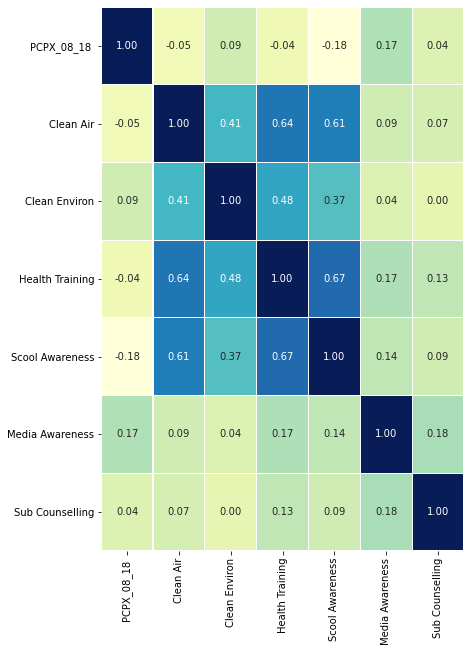

In [72]:
######## Analysis #######
# Part1

#2008-2018

#Coefficient matrix

correlation_matrix_08_18 = df_final_08_18.rename(columns={
                                                        'clean_air_mean':'Clean Air',
                                                        'clean_environ_mean':'Clean Environ',
                                                        'health_training_mean':'Health Training',
                                                        'school_awareness_mean':'Scool Awareness',
                                                        'media_awareness_mean':'Media Awareness',
                                                        'sub_counselling_mean':'Sub Counselling',
                                                        'dif_08_18':'PCPX_08_18 ',
                                                    
    
                        })

#yticklabels=[7,6,5,4,3,2,1],xticklabels=[1,2,3,4,5,6,7]
correlation_matrix_08_18 = correlation_matrix_08_18.corr(method='pearson')
plt.figure(figsize=(6.5,10))
sns.heatmap(correlation_matrix_08_18,linewidths=.1,cbar=False,annot=True,cmap="YlGnBu", fmt=".2f")




In [73]:
#regression 2008-2018
model_conditionX_rate_change_08_18 = sms.formula.ols('dif_08_18 ~ clean_air_mean + clean_environ_mean + health_training_mean + school_awareness_mean + media_awareness_mean + sub_counselling_mean', df_final_08_18).fit()
print(model_conditionX_rate_change_08_18.summary())

                            OLS Regression Results                            
Dep. Variable:              dif_08_18   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     2.591
Date:                Sun, 15 Nov 2020   Prob (F-statistic):             0.0205
Time:                        20:02:59   Log-Likelihood:                -590.09
No. Observations:                 152   AIC:                             1194.
Df Residuals:                     145   BIC:                             1215.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 7.04

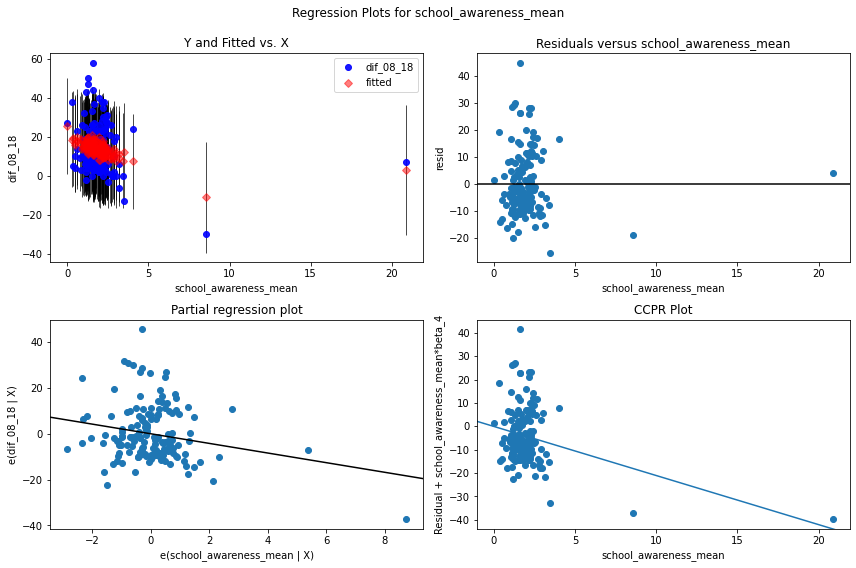

In [74]:
fig = plt.figure(figsize=(12,8))
fig = sms.graphics.plot_regress_exog(model_conditionX_rate_change_08_18, 'school_awareness_mean', fig=fig)

<AxesSubplot:>

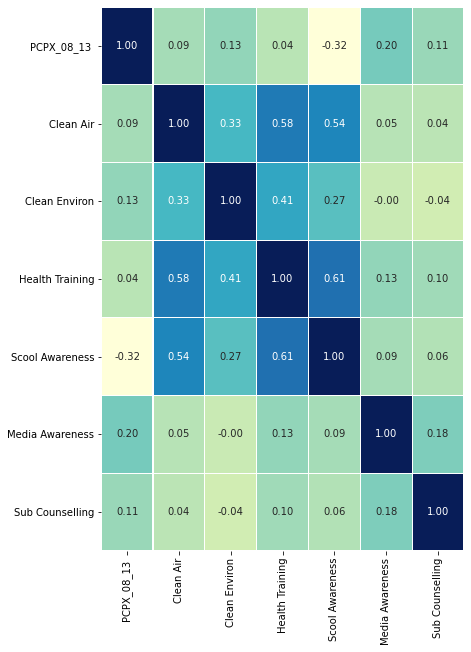

In [75]:
####### 2008-2013 #######

#Coefficient matrix
correlation_matrix_08_13 = df_final_08_13.rename(columns={
                                                        'clean_air_mean_08_13':'Clean Air',
                                                        'clean_environ_mean_08_13':'Clean Environ',
                                                        'health_training_mean_08_13':'Health Training',
                                                        'school_awareness_mean_08_13':'Scool Awareness',
                                                        'media_awareness_mean_08_13':'Media Awareness',
                                                        'sub_counselling_mean_08_13':'Sub Counselling',
                                                        'dif_08_13':'PCPX_08_13 ',
                                                    
    
                        })

#yticklabels=[7,6,5,4,3,2,1],xticklabels=[1,2,3,4,5,6,7]
correlation_matrix_08_13 = correlation_matrix_08_13.corr(method='pearson')
plt.figure(figsize=(6.5,10))
sns.heatmap(correlation_matrix_08_13,linewidths=.1,cbar=False,annot=True,cmap="YlGnBu", fmt=".2f")


In [29]:
#regression 2008-2013
model_conditionX_rate_change_08_13 = sms.formula.ols('dif_08_13 ~ clean_air_mean_08_13 + clean_environ_mean_08_13 + health_training_mean_08_13 + school_awareness_mean_08_13 + media_awareness_mean_08_13 + sub_counselling_mean_08_13', df_final_08_13).fit()
print(model_conditionX_rate_change_08_13.summary())

                            OLS Regression Results                            
Dep. Variable:              dif_08_13   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     10.69
Date:                Sat, 14 Nov 2020   Prob (F-statistic):           8.10e-10
Time:                        19:01:38   Log-Likelihood:                -524.05
No. Observations:                 152   AIC:                             1062.
Df Residuals:                     145   BIC:                             1083.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

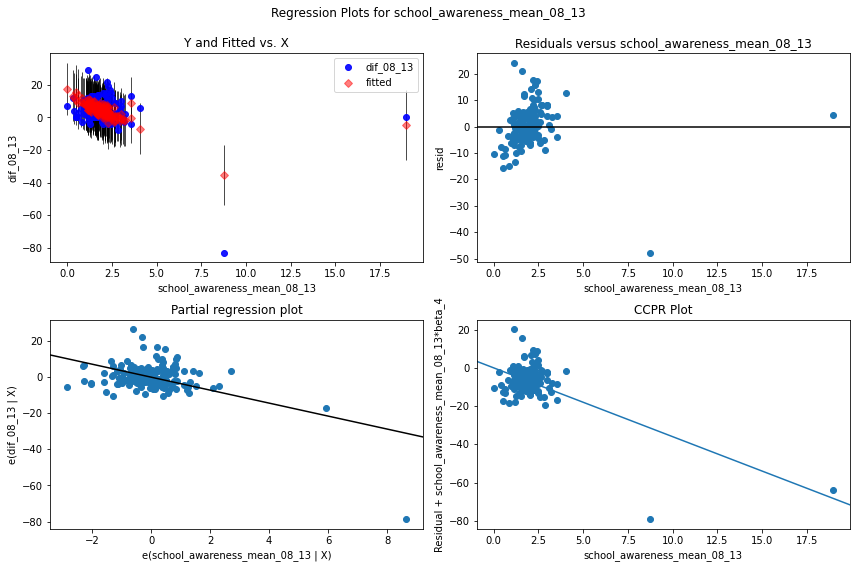

In [47]:
fig = plt.figure(figsize=(12,8))
fig = sms.graphics.plot_regress_exog(model_conditionX_rate_change_08_13, 'school_awareness_mean_08_13', fig=fig)

<AxesSubplot:>

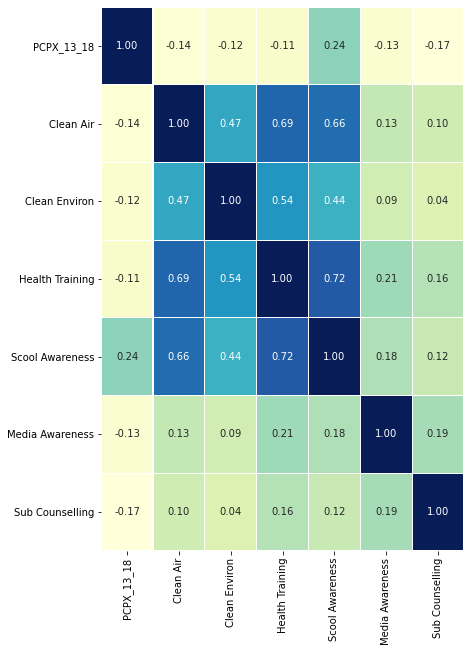

In [76]:
####### 2013-2018 #######

#Coefficient matrix
correlation_matrix_13_18 = df_final_13_18.rename(columns={
                                                        'clean_air_mean_13_18':'Clean Air',
                                                        'clean_environ_mean_13_18':'Clean Environ',
                                                        'health_training_mean_13_18':'Health Training',
                                                        'school_awareness_mean_13_18':'Scool Awareness',
                                                        'media_awareness_mean_13_18':'Media Awareness',
                                                        'sub_counselling_mean_13_18':'Sub Counselling',
                                                        'dif_13_18':'PCPX_13_18',
                                                    
    
                        })


#yticklabels=[7,6,5,4,3,2,1],xticklabels=[1,2,3,4,5,6,7]
correlation_matrix_13_18 = correlation_matrix_13_18.corr(method='pearson')
plt.figure(figsize=(6.5,10))
sns.heatmap(correlation_matrix_13_18,linewidths=.1,cbar=False,annot=True,cmap="YlGnBu", fmt=".2f")

In [38]:
#regression 2013-2018
model_conditionX_rate_change_13_18 = sms.formula.ols('dif_13_18 ~ clean_air_mean_13_18 + clean_environ_mean_13_18 + health_training_mean_13_18 + school_awareness_mean_13_18 + media_awareness_mean_13_18 + sub_counselling_mean_13_18', df_final_13_18).fit()
print(model_conditionX_rate_change_13_18.summary())

                            OLS Regression Results                            
Dep. Variable:              dif_13_18   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     12.58
Date:                Sat, 14 Nov 2020   Prob (F-statistic):           2.16e-11
Time:                        19:10:15   Log-Likelihood:                -673.57
No. Observations:                 152   AIC:                             1361.
Df Residuals:                     145   BIC:                             1382.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

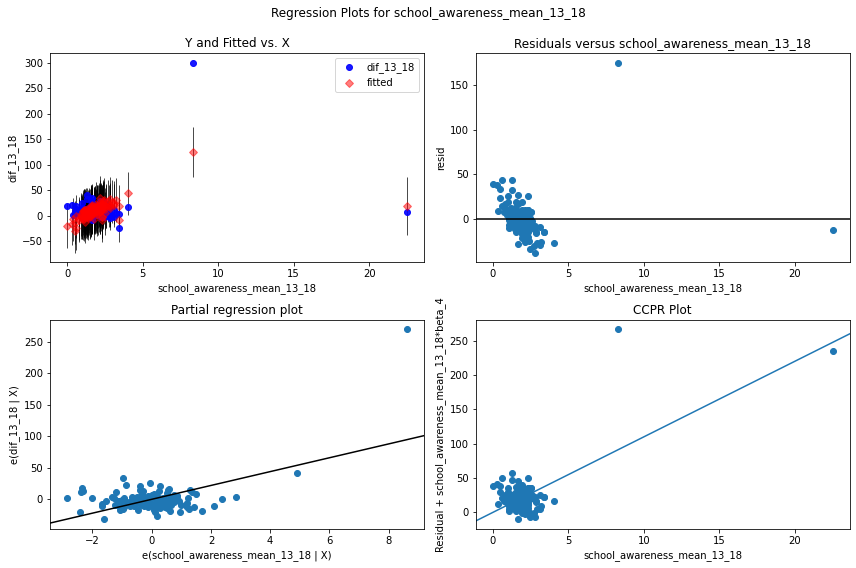

In [46]:
fig = plt.figure(figsize=(12,8))
fig = sms.graphics.plot_regress_exog(model_conditionX_rate_change_13_18, 'school_awareness_mean_13_18', fig=fig)